In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('monthly-sales.xlsx', sheet_name=0, index_col= 'Month')
df


,Monthly Sales
Month,
2008-01,154000
2008-02,96000
2008-03,73000
2008-04,51000
2008-05,53000
...,...
2013-05,231000
2013-06,271000
2013-07,329000


<function matplotlib.pyplot.show(*args, **kw)>

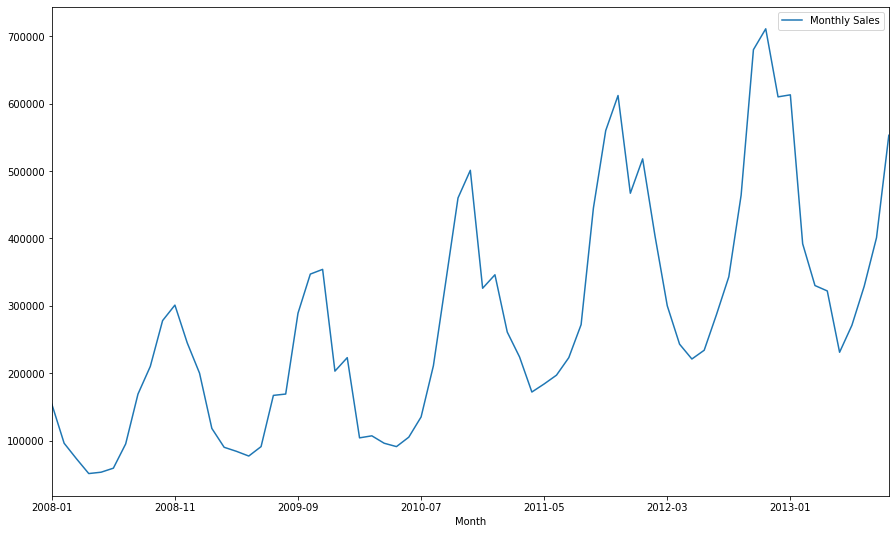

In [3]:
df.plot(figsize=(15, 9))
plt.show

In [5]:
df.head()

,Monthly Sales
Month,
2008-01,154000
2008-02,96000
2008-03,73000
2008-04,51000
2008-05,53000


In [7]:
bvp = df.groupby('Month')["Monthly Sales"].mean().reset_index()
bvp

,Month,Monthly Sales
0,2008-01,154000
1,2008-02,96000
2,2008-03,73000
3,2008-04,51000
4,2008-05,53000
...,...,...
64,2013-05,231000
65,2013-06,271000
66,2013-07,329000
67,2013-08,401000


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

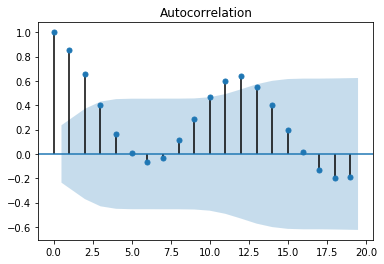

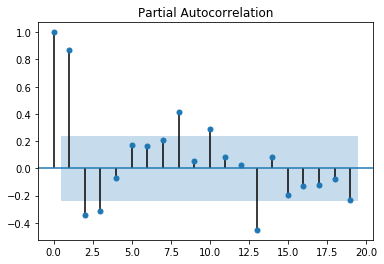

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plot_pacf(df)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [19]:
x = df['Monthly Sales']

In [20]:
adfuller(x)

(1.6961131690398792,
 0.9981190945599544,
 11,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 1391.6541354673714)

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
df = sm.add_constant(df)

In [ ]:
df = df.dropna()

In [ ]:
results = sm.OLS(df['Monthly Sales'],df[['const','Monthly_Sales_pct']]).fit()
print(results.summary())

In [ ]:
results.params[0]

In [ ]:
results.params[1]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
x = df['Monthly Sales']

In [ ]:
plot_acf(x, lags= 20, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import acf
print(acf(x))

In [ ]:
plot_acfp(x, lags= 20, alpha=0.05)

In [ ]:
noise = np.random.normal(loc=0, scale=1, size=500)

In [ ]:
plt.plot(noise)

In [ ]:
plot_acf(noise, lags=50)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(x)

In [ ]:
plt.plot(x)

In [ ]:
plt.plot(x.diff(1))

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()

In [ ]:
print(result.summary())

In [ ]:
print(result.params)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
res = mod.fit()
res.plot_predict()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
plot_pacf(x, lags= 40, alpha=0.05)


In [ ]:
plot_acf(x, lags= 40, alpha=0.05)

In [ ]:
result.aic


In [ ]:
result.bic

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(0,1))
result = mod.fit()

In [ ]:
result.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import coint
coint(P,Q)